In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
import matplotlib
matplotlib.rc('figure', figsize=(20,8))
matplotlib.rc('font', size = 14)
matplotlib.rc('axes.spines', top = False, right = False)
matplotlib.rc('axes',grid=False)
matplotlib.rc('axes', facecolor = 'white')


In [2]:
df = pd.read_json('/home/troy/Downloads/modcloth_final_data.json', lines = True)  # If lines = True is not present, code block will not run
df.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [3]:
df = df[sorted(df.columns)]  # Originally the dataset is not sorted and there if the EDA is done without sorting, we can lose important values!
df.columns  # Returns names of all columns in dataset

Index(['bra size', 'bust', 'category', 'cup size', 'fit', 'height', 'hips',
       'item_id', 'length', 'quality', 'review_summary', 'review_text',
       'shoe size', 'shoe width', 'size', 'user_id', 'user_name', 'waist'],
      dtype='object')

In [4]:
# Renaming columns for ease of use
df = df[sorted(df.columns)]
df.columns = ['bra_size', 'bust', 'category', 'cup_size', 'fit', 'height', 'hips', 'item_id', 'length', 'quality', 'review_summary', 'review_text', 'shoe_size', 'shoe_width', 'size', 'user_id', 'user_name', 'waist']
df.columns

Index(['bra_size', 'bust', 'category', 'cup_size', 'fit', 'height', 'hips',
       'item_id', 'length', 'quality', 'review_summary', 'review_text',
       'shoe_size', 'shoe_width', 'size', 'user_id', 'user_name', 'waist'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bra_size        76772 non-null  float64
 1   bust            11854 non-null  object 
 2   category        82790 non-null  object 
 3   cup_size        76535 non-null  object 
 4   fit             82790 non-null  object 
 5   height          81683 non-null  object 
 6   hips            56064 non-null  float64
 7   item_id         82790 non-null  int64  
 8   length          82755 non-null  object 
 9   quality         82722 non-null  float64
 10  review_summary  76065 non-null  object 
 11  review_text     76065 non-null  object 
 12  shoe_size       27915 non-null  float64
 13  shoe_width      18607 non-null  object 
 14  size            82790 non-null  int64  
 15  user_id         82790 non-null  int64  
 16  user_name       82790 non-null  object 
 17  waist           2882 non-null  

In [6]:
df.describe()

,bra_size,hips,item_id,quality,shoe_size,size,user_id,waist
count,76772.000000,56064.000000,82790.000000,82722.000000,27915.000000,82790.000000,82790.000000,2882.000000
mean,35.972125,40.358501,469325.229170,3.949058,8.145818,12.661602,498849.564718,31.319223
std,3.224907,5.827166,213999.803314,0.992783,1.336109,8.271952,286356.969459,5.302849
min,28.000000,30.000000,123373.000000,1.000000,5.000000,0.000000,6.000000,20.000000
25%,34.000000,36.000000,314980.000000,3.000000,7.000000,8.000000,252897.750000,28.000000
50%,36.000000,39.000000,454030.000000,4.000000,8.000000,12.000000,497913.500000,30.000000
75%,38.000000,43.000000,658440.000000,5.000000,9.000000,15.000000,744745.250000,34.000000
max,48.000000,60.000000,807722.000000,5.000000,38.000000,38.000000,999972.000000,50.000000


In [7]:
# Find the number of missing data 
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/82790)*100}) # 82790 is the count from describe()
missing_data

,total_missing,perc_missing
bra_size,6018,7.268994
bust,70936,85.681846
category,0,0.000000
cup_size,6255,7.555260
fit,0,0.000000
height,1107,1.337118
hips,26726,32.281677
item_id,0,0.000000
length,35,0.042276
quality,68,0.082136


In [8]:
df.describe()

,bra_size,hips,item_id,quality,shoe_size,size,user_id,waist
count,76772.000000,56064.000000,82790.000000,82722.000000,27915.000000,82790.000000,82790.000000,2882.000000
mean,35.972125,40.358501,469325.229170,3.949058,8.145818,12.661602,498849.564718,31.319223
std,3.224907,5.827166,213999.803314,0.992783,1.336109,8.271952,286356.969459,5.302849
min,28.000000,30.000000,123373.000000,1.000000,5.000000,0.000000,6.000000,20.000000
25%,34.000000,36.000000,314980.000000,3.000000,7.000000,8.000000,252897.750000,28.000000
50%,36.000000,39.000000,454030.000000,4.000000,8.000000,12.000000,497913.500000,30.000000
75%,38.000000,43.000000,658440.000000,5.000000,9.000000,15.000000,744745.250000,34.000000
max,48.000000,60.000000,807722.000000,5.000000,38.000000,38.000000,999972.000000,50.000000


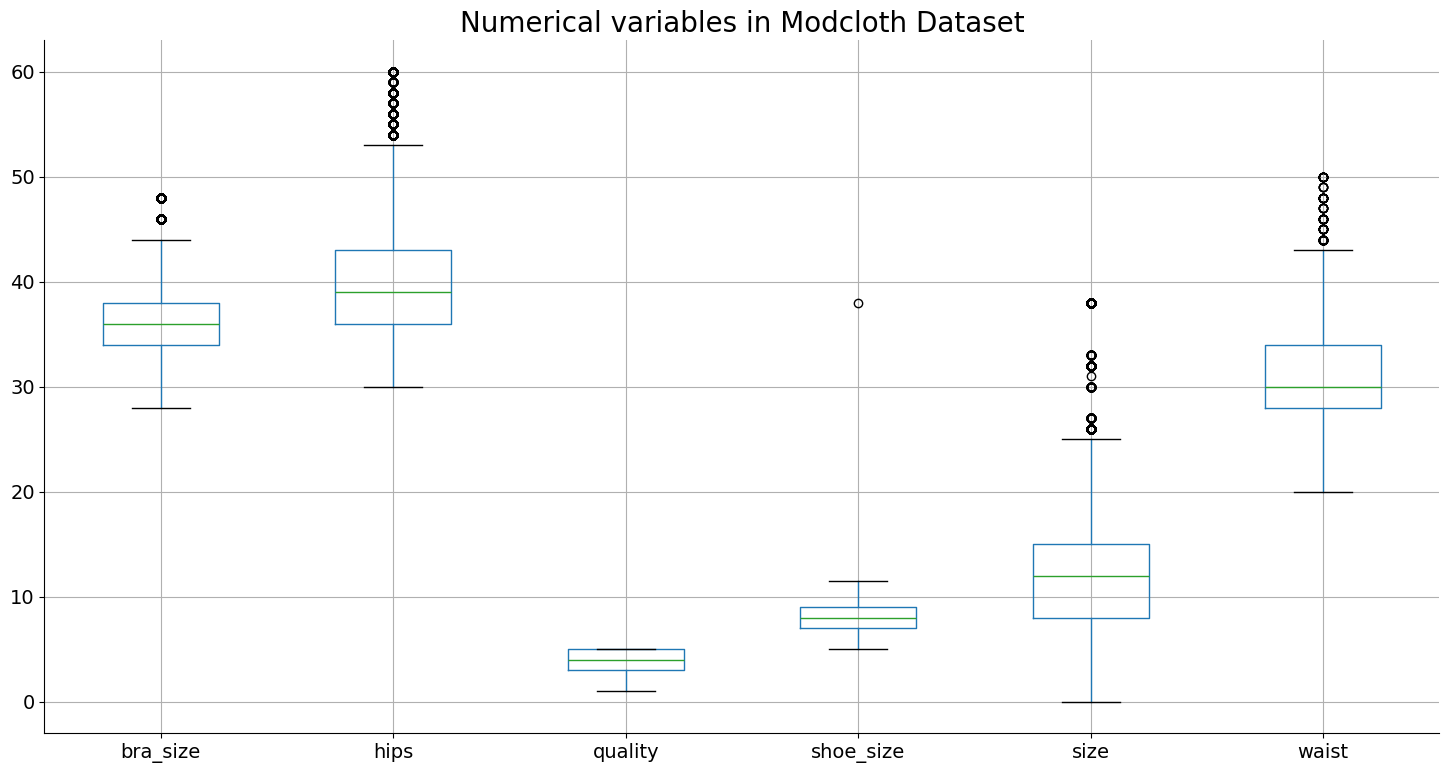

In [9]:
# Boxplot of numerical variables
nums_cols = ['bra_size', 'hips', 'quality', 'shoe_size', 'size', 'waist']
plt.figure(figsize=(18,9))
df[nums_cols].boxplot()
plt.title("Numerical variables in Modcloth Dataset", fontsize=20)
plt.show()

In [10]:
df[df.shoe_size == 38]


,bra_size,bust,category,cup_size,fit,height,hips,item_id,length,quality,review_summary,review_text,shoe_size,shoe_width,size,user_id,user_name,waist
37313,36.0,37-39,new,d,fit,5ft 5in,46.0,416942,just right,5.0,Cardigans are best item Mod Cloth has,"I love these cardigans, my favorite, good fabr...",38.0,average,12,237498,Catslittle,35.0


In [11]:
df.at[37313,'shoe_size'] = None

In [12]:
df.sort_values(by=['bra_size'], ascending=False).head(10)

,bra_size,bust,category,cup_size,fit,height,hips,item_id,length,quality,review_summary,review_text,shoe_size,shoe_width,size,user_id,user_name,waist
70373,48.0,NaN,bottoms,dd/e,large,5ft 4in,59.0,723208,just right,5.0,These are perfect.. when,"These are perfect.. when I bend over, it isn't...",NaN,NaN,32,721356,fufunator14,NaN
70338,48.0,NaN,bottoms,b,small,5ft 7in,54.0,723208,slightly short,2.0,Not the best. Not the wor,Not the best. Not the worst. I would size up i...,NaN,NaN,32,921034,Lux,NaN
41489,48.0,NaN,tops,d,large,5ft 8in,55.0,454030,slightly long,3.0,Great tunic,Great tunic,NaN,NaN,38,375140,lmdrews,NaN
70254,48.0,NaN,bottoms,ddd/f,fit,5ft 3in,53.0,723208,just right,3.0,So fab and comfy!,So fab and comfy!,NaN,NaN,26,14245,Kristy,NaN
70309,48.0,NaN,bottoms,d,fit,5ft 5in,NaN,723208,just right,4.0,Started off a little snug,Started off a little snug but the fabric molds...,NaN,NaN,26,748410,drowningsirenscream,NaN
21209,48.0,NaN,dresses,ddd/f,small,5ft 3in,57.0,330139,just right,3.0,Big disappointment!!!,I guess it is my fault for not reading reviews...,9.5,wide,38,655180,Rebekah,50.0
58223,48.0,NaN,tops,c,fit,5ft 6in,51.0,647551,just right,5.0,flattering fit,flattering fit,NaN,NaN,32,188423,mrs.amypetit,NaN
21370,48.0,NaN,dresses,ddd/f,small,5ft 8in,45.0,338596,very short,2.0,Didn't fit,Didn't fit,NaN,NaN,20,386550,ragblossom23,NaN
21432,48.0,NaN,dresses,ddd/f,small,5ft 3in,60.0,338596,just right,3.0,I'm confused that no one,I'm confused that no one has remarked on how I...,NaN,NaN,38,313743,Lexie,NaN
58011,48.0,NaN,tops,dd/e,fit,5ft 6in,48.0,647235,just right,5.0,Hanging around in this to,Hanging around in this top and leggings.,NaN,NaN,26,654951,ladink,NaN


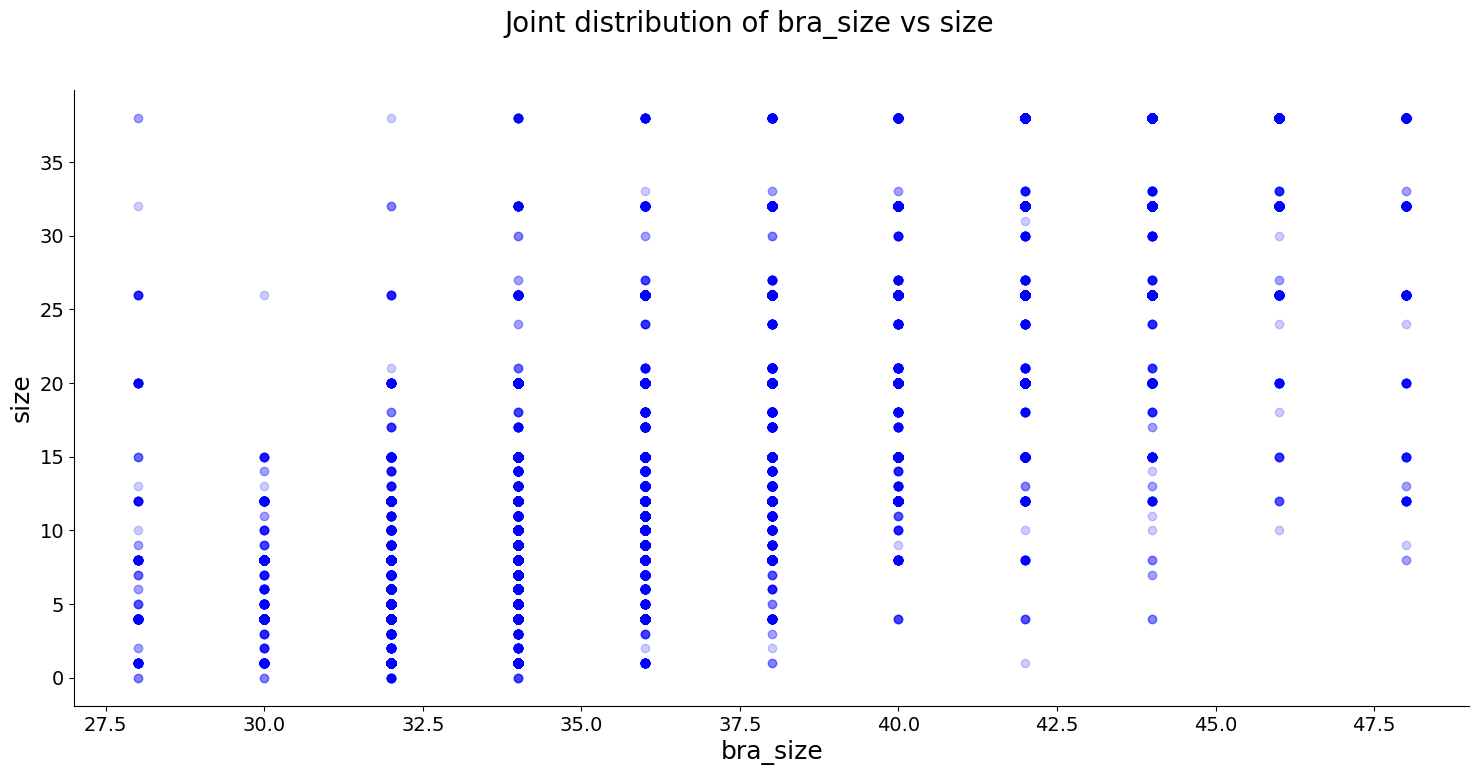

In [13]:
# Joint Distribution of bra_size vs size
plt.figure(figsize=(18,8))
plt.xlabel("bra_size", fontsize=18)
plt.ylabel("size", fontsize=18)
plt.suptitle("Joint distribution of bra_size vs size", fontsize=20)
plt.plot(df.bra_size, df['size'], 'bo', alpha=0.2)
plt.show()

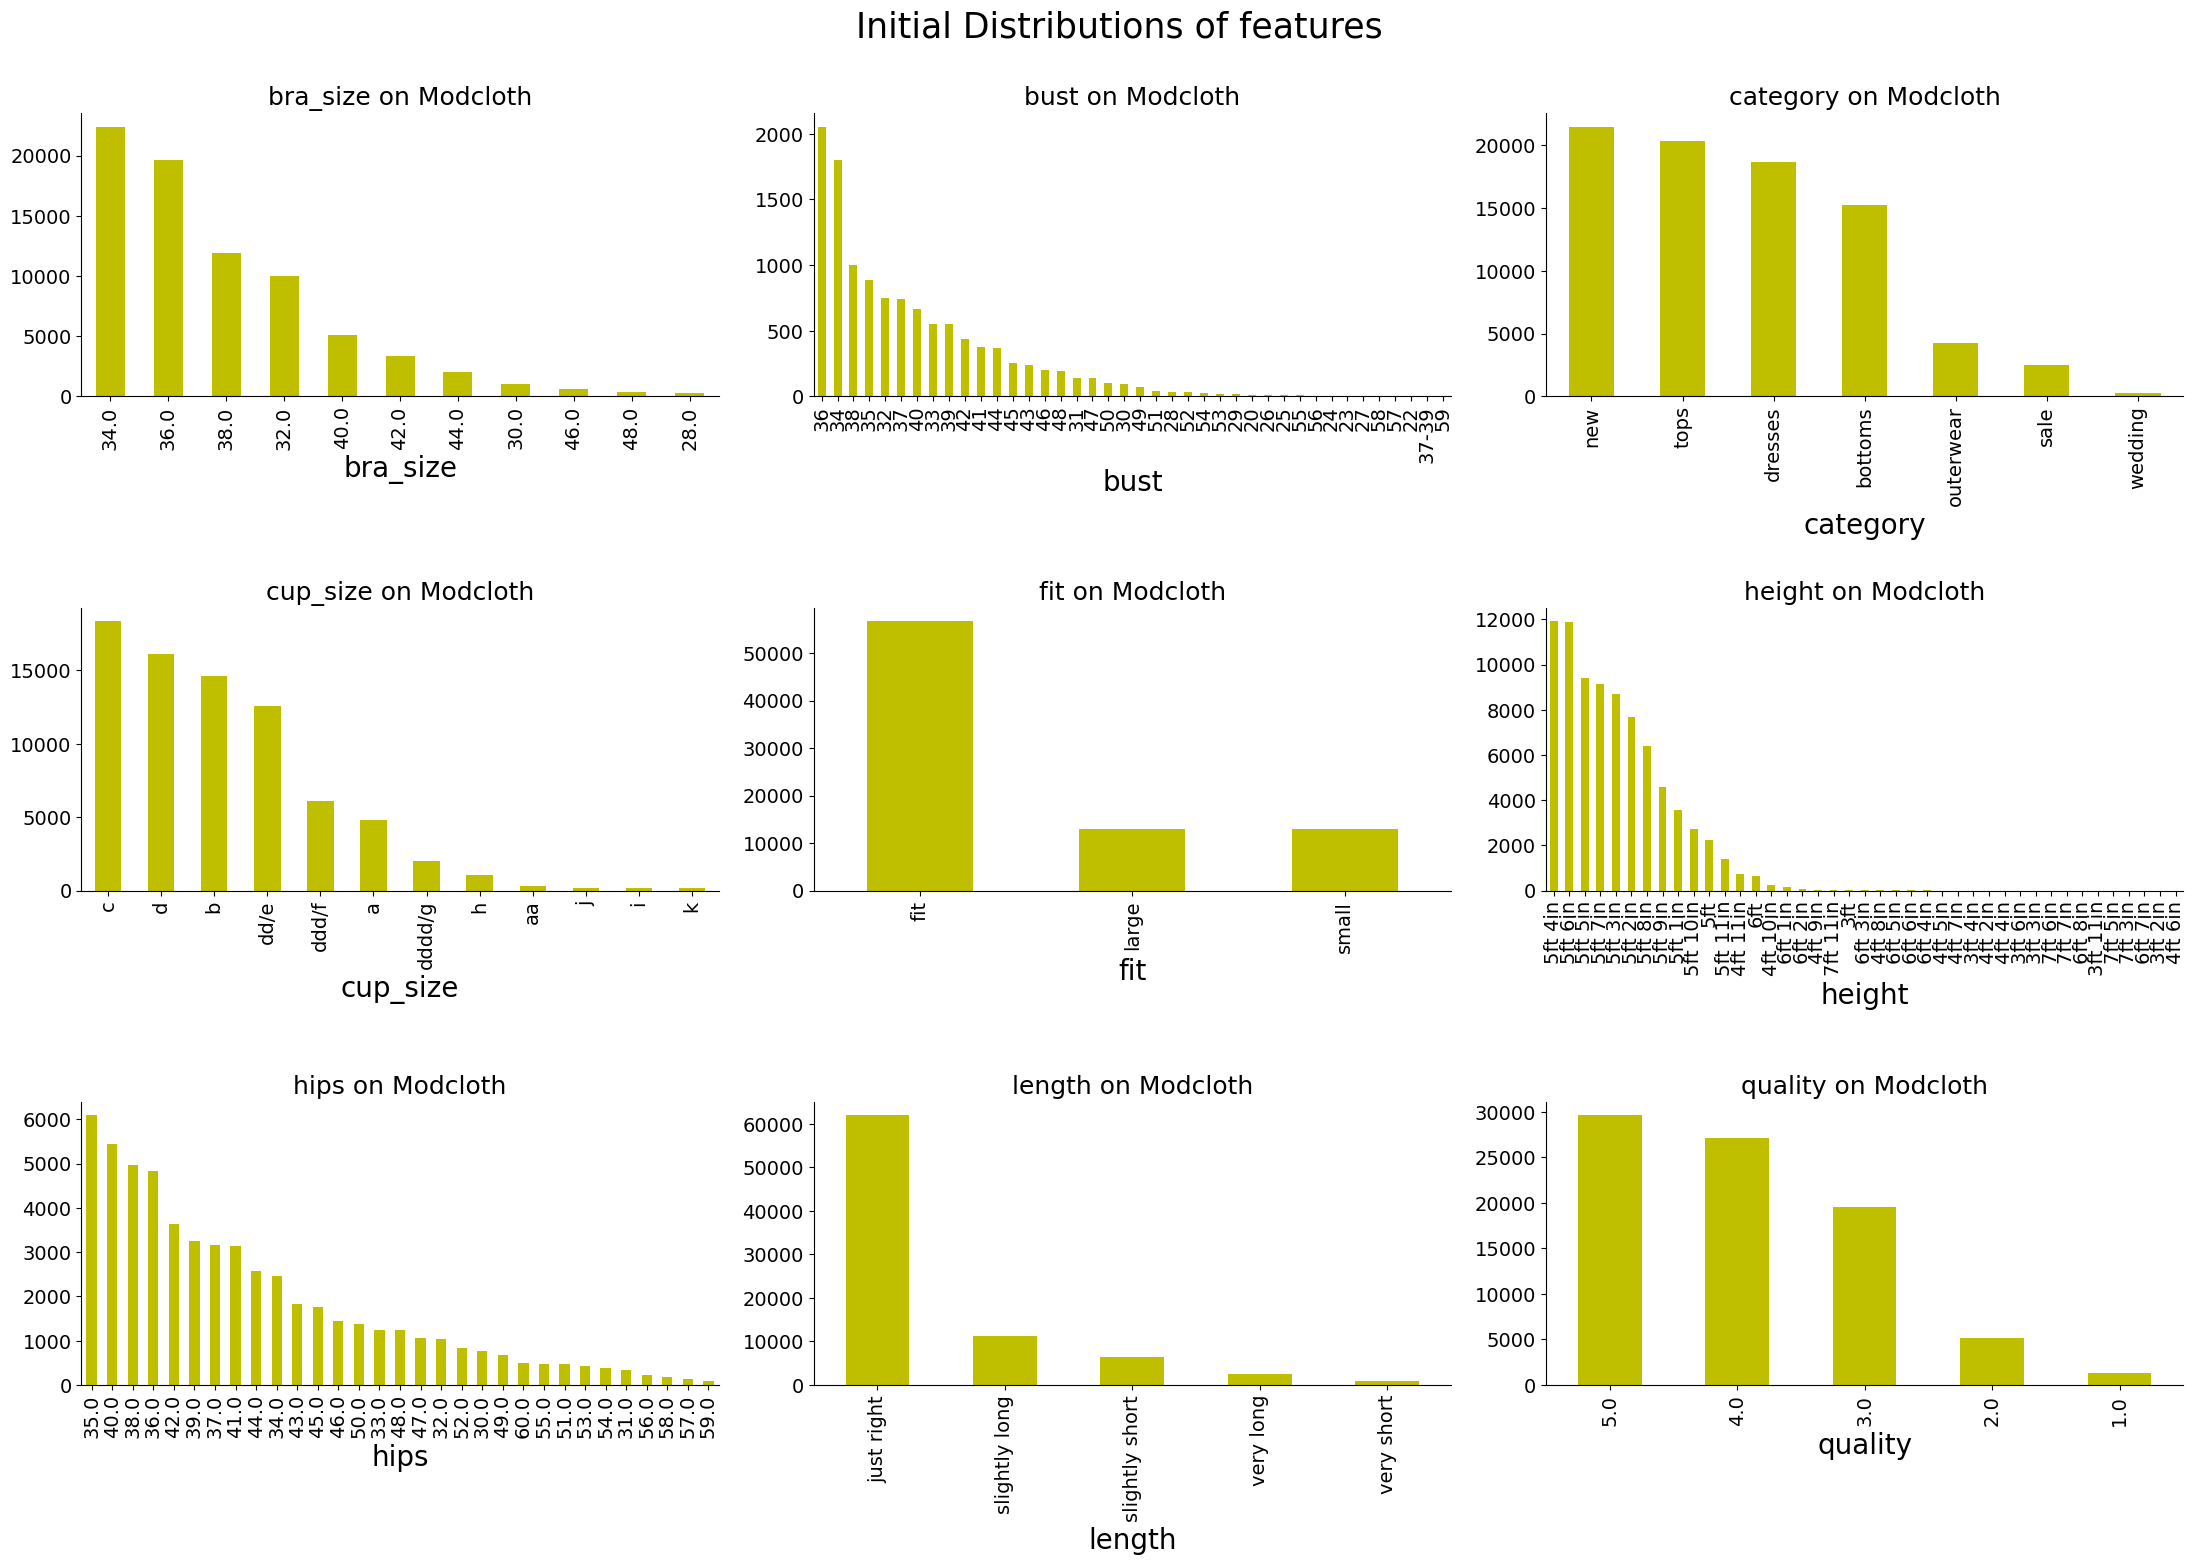

In [14]:
def plot_dist(col, ax):
    df[col][df[col].notnull()].value_counts().plot(kind='bar', facecolor='y', ax=ax)
    ax.set_xlabel('{}'.format(col), fontsize=20)
    ax.set_title('{} on Modcloth'.format(col), fontsize=18)
    return ax 

f, ax = plt.subplots(3,3,figsize=(22,15))
f.tight_layout(h_pad=9,w_pad=2, rect=[0, 0.03, 1, 0.93])
cols = ['bra_size', 'bust', 'category', 'cup_size', 'fit', 'height', 'hips', 'length', 'quality']
k = 0
for i in range(3):
    for j in range(3):
        plot_dist(cols[k],ax[i][j])
        k+=1
__=plt.suptitle("Initial Distributions of features", fontsize=25)

In [15]:
df.bra_size = df.bra_size.fillna('Unknown')
df.bra_size = df.bra_size.astype('category').cat.as_ordered()
df.at[37313,'bust'] = '38'
df.bust = df.bust.fillna(0).astype(int)
df.category = df.category.astype('category')

In [16]:
df[df.cup_size.isnull()].sample(10)

,bra_size,bust,category,cup_size,fit,height,hips,item_id,length,quality,review_summary,review_text,shoe_size,shoe_width,size,user_id,user_name,waist
58726,Unknown,0,tops,NaN,fit,5ft 6in,NaN,650890,slightly long,4.0,This top is a little flim,This top is a little flimsy and clings to my b...,NaN,NaN,26,202139,Sarah,NaN
37552,Unknown,0,new,NaN,fit,5ft 4in,NaN,416942,just right,5.0,i love how soft the fabri,i love how soft the fabric is. and the color i...,NaN,NaN,12,999888,m.buchtel,NaN
5343,Unknown,0,new,NaN,fit,5ft 2in,NaN,151045,slightly short,5.0,NaN,NaN,NaN,NaN,32,524822,shannon62886,NaN
68829,Unknown,0,bottoms,NaN,large,5ft 7in,NaN,715662,just right,5.0,I got an XL because of my,I got an XL because of my behind. the waist is...,NaN,NaN,20,199270,kerri.c.connell,NaN
63102,Unknown,0,new,NaN,small,5ft 6in,NaN,661775,just right,5.0,"Love, love, love this ski","Love, love, love this skirt. It's VERY tight a...",NaN,NaN,8,366224,Annika,NaN
25853,Unknown,0,dresses,NaN,small,5ft 2in,NaN,393989,just right,5.0,loved this but they sent,loved this but they sent me a size small inste...,NaN,NaN,4,750613,cpena913,NaN
67386,Unknown,0,bottoms,NaN,fit,5ft 5in,NaN,698964,just right,5.0,I was a little skeptical,I was a little skeptical about these pants bec...,NaN,NaN,8,116939,speedingbeauty,NaN
60932,Unknown,0,new,NaN,fit,5ft 3in,43.0,656645,just right,4.0,I wish that the liner in,I wish that the liner in the skirt wasn't as t...,NaN,NaN,12,171935,cherryowls,NaN
29275,Unknown,0,new,NaN,large,5ft 5in,NaN,402677,very long,3.0,This would be a nice t sh,This would be a nice t shirt but it runs HUGE!...,NaN,NaN,4,309732,Betty,NaN
56352,Unknown,0,tops,NaN,fit,5ft 6in,NaN,641126,just right,5.0,A new favorite! I adore,"A new favorite! I adore baseball tees, and th...",NaN,NaN,4,644165,kel.york,NaN


In [17]:
df.cup_size.fillna("Unknown",inplace=True)
df.cup_size = df.cup_size.astype('category').cat.as_ordered()
df.fit = df.fit.astype('category')

In [18]:
# Converting height from US to cm
'''ArithmeticErrordef get_cm(x):
    if type(x) == (1.0):
        return 
    try:
        return (int(x[0])*30.48) + (int(x[4:-2])*2.54)
    except:
        return (int(x[0])*30.48)
df.height = df.height.apply(get_cm)'''

def get_cm(x):    # If x is NaN (or not a string), return NaN
    if pd.isna(x) or not isinstance(x, str):
        return np.nan
    
    try:
        # Example format: "5'7\""
        feet = int(x[0])                # first character = feet
        inches = int(x[2:-1])           # between ' and " → e.g., x[2:-1] from "5'7\"" gives "7"
        return feet * 30.48 + inches * 2.54
    except (ValueError, IndexError):
        # If parsing fails, try just feet (e.g., "5'")
        try:
            feet = int(x[0])
            return feet * 30.48
        except (ValueError, IndexError):
            return np.nan
df['height'] = df['height'].apply(get_cm)

In [19]:
df[df.height.isnull()].head(5)

,bra_size,bust,category,cup_size,fit,height,hips,item_id,length,quality,review_summary,review_text,shoe_size,shoe_width,size,user_id,user_name,waist
3,Unknown,0,new,dd/e,fit,NaN,NaN,123373,just right,5.0,NaN,NaN,NaN,NaN,21,875643,alexmeyer626,NaN
17,36.0,0,new,dddd/g,large,NaN,NaN,123373,just right,4.0,NaN,NaN,NaN,NaN,15,128353,Megan,NaN
43,36.0,0,new,dd/e,fit,NaN,NaN,123373,just right,5.0,NaN,NaN,NaN,NaN,15,670919,sdhewey,NaN
73,38.0,0,new,c,large,NaN,NaN,124124,just right,4.0,NaN,NaN,NaN,NaN,20,816504,Fiorella,NaN
131,36.0,0,new,c,fit,NaN,NaN,124124,very short,3.0,NaN,NaN,NaN,NaN,12,846091,jmcrowder.1124,NaN


In [20]:
print(df[((df.bra_size != 'Unknown') | (df.cup_size != 'Unknown')) & (df.height.isnull()) & (df.hips.isnull()) &
     (df.shoe_size.isnull()) & (df.shoe_width.isnull()) & (df.waist.isnull())].head(3))
print(df[(df.bra_size == 'Unknown') & (df.cup_size == 'Unknown') & (df.height.isnull()) & (df.hips.isnull()) &
     ((df.shoe_size.notnull()) | (df.shoe_width.notnull())) & (df.waist.isnull())].head(3))
print(df[(df.bra_size == 'Unknown') & (df.cup_size == 'Unknown') & (df.height.isnull()) & ((df.hips.notnull()) | (df.waist.notnull())) &
     (df.shoe_size.isnull()) & (df.shoe_width.isnull())].head(3))

   bra_size  bust category cup_size    fit  height  hips  item_id      length  \
3   Unknown     0      new     dd/e    fit     NaN   NaN   123373  just right   
17     36.0     0      new   dddd/g  large     NaN   NaN   123373  just right   
43     36.0     0      new     dd/e    fit     NaN   NaN   123373  just right   

    quality review_summary review_text  shoe_size shoe_width  size  user_id  \
3       5.0            NaN         NaN        NaN        NaN    21   875643   
17      4.0            NaN         NaN        NaN        NaN    15   128353   
43      5.0            NaN         NaN        NaN        NaN    15   670919   

       user_name  waist  
3   alexmeyer626    NaN  
17         Megan    NaN  
43       sdhewey    NaN  
    bra_size  bust category cup_size    fit  height  hips  item_id  \
553  Unknown     0      new  Unknown    fit     NaN   NaN   125442   
591  Unknown     0      new  Unknown  small     NaN   NaN   125442   
665  Unknown     0      new  Unknown    fit 

In [21]:
lingerie_cond = (((df.bra_size != 'Unknown') | (df.cup_size != 'Unknown')) & (df.height.isnull()) & (df.hips.isnull()) &
     (df.shoe_size.isnull()) & (df.shoe_width.isnull()) & (df.waist.isnull()))
shoe_cond = ((df.bra_size == 'Unknown') & (df.cup_size == 'Unknown') & (df.height.isnull()) & (df.hips.isnull()) &
     ((df.shoe_size.notnull()) | (df.shoe_width.notnull())) & (df.waist.isnull()))
dress_cond = ((df.bra_size == 'Unknown') & (df.cup_size == 'Unknown') & (df.height.isnull()) & ((df.hips.notnull()) | (df.waist.notnull())) &
     (df.shoe_size.isnull()) & (df.shoe_width.isnull()))

df['first_time_user'] = (lingerie_cond | shoe_cond | dress_cond)
print("Column added!")
print("Total transactions by first time users who bought bra, shoes, or a dress: " + str(sum(df.first_time_user)))
print("Total first time users: " + str(len(df[(lingerie_cond | shoe_cond | dress_cond)].user_id.unique())))

Column added!
Total transactions by first time users who bought bra, shoes, or a dress: 903
Total first time users: 565


In [22]:
# Handling hips column
df.hips = df.hips.fillna(-1.0)
bins = [-5, 0, 31, 37, 40, 44, 75]
labels=['Unknown', 'XS', 'S', 'M', 'L', 'XL']
df.hips = pd.cut(df.hips, bins, labels=labels)

# Handling lenght column
missing_rows = df[df.length.isnull()].index
df.drop(missing_rows, axis = 0, inplace=True)

# Handling quality
missing_rows = df[df.quality.isnull()].index
df.drop(missing_rows, axis=0, inplace=True)
df.quality = df.quality.astype('category').cat.as_ordered()

In [23]:
from pandas.api.types import CategoricalDtype

shoe_widths_type = CategoricalDtype(categories=['Unknown', 'narrow', 'average', 'wide'], ordered=True)

df.review_summary = df.review_summary.fillna('Unknown')
df.review_text = df.review_text.fillna('Unknown')  # Note: typo "Unkown" → should it be "Unknown"?
df.shoe_size = df.shoe_size.fillna('Unknown')
df.shoe_size = df.shoe_size.astype('category').cat.as_ordered()
df.shoe_width = df.shoe_width.fillna('Unknown')
df.shoe_width = df.shoe_width.astype(shoe_widths_type)
df.drop(['waist', 'bust', 'user_name'], axis=1, inplace=True)
missing_rows = df[df.height.isnull()].index
df.drop(missing_rows, axis=0, inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81594 entries, 0 to 82789
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   bra_size         81594 non-null  category
 1   category         81594 non-null  category
 2   cup_size         81594 non-null  category
 3   fit              81594 non-null  category
 4   height           81594 non-null  float64 
 5   hips             81594 non-null  category
 6   item_id          81594 non-null  int64   
 7   length           81594 non-null  object  
 8   quality          81594 non-null  category
 9   review_summary   81594 non-null  object  
 10  review_text      81594 non-null  object  
 11  shoe_size        81594 non-null  category
 12  shoe_width       81594 non-null  category
 13  size             81594 non-null  int64   
 14  user_id          81594 non-null  int64   
 15  first_time_user  81594 non-null  bool    
dtypes: bool(1), category(8), float64(1), int64(3)

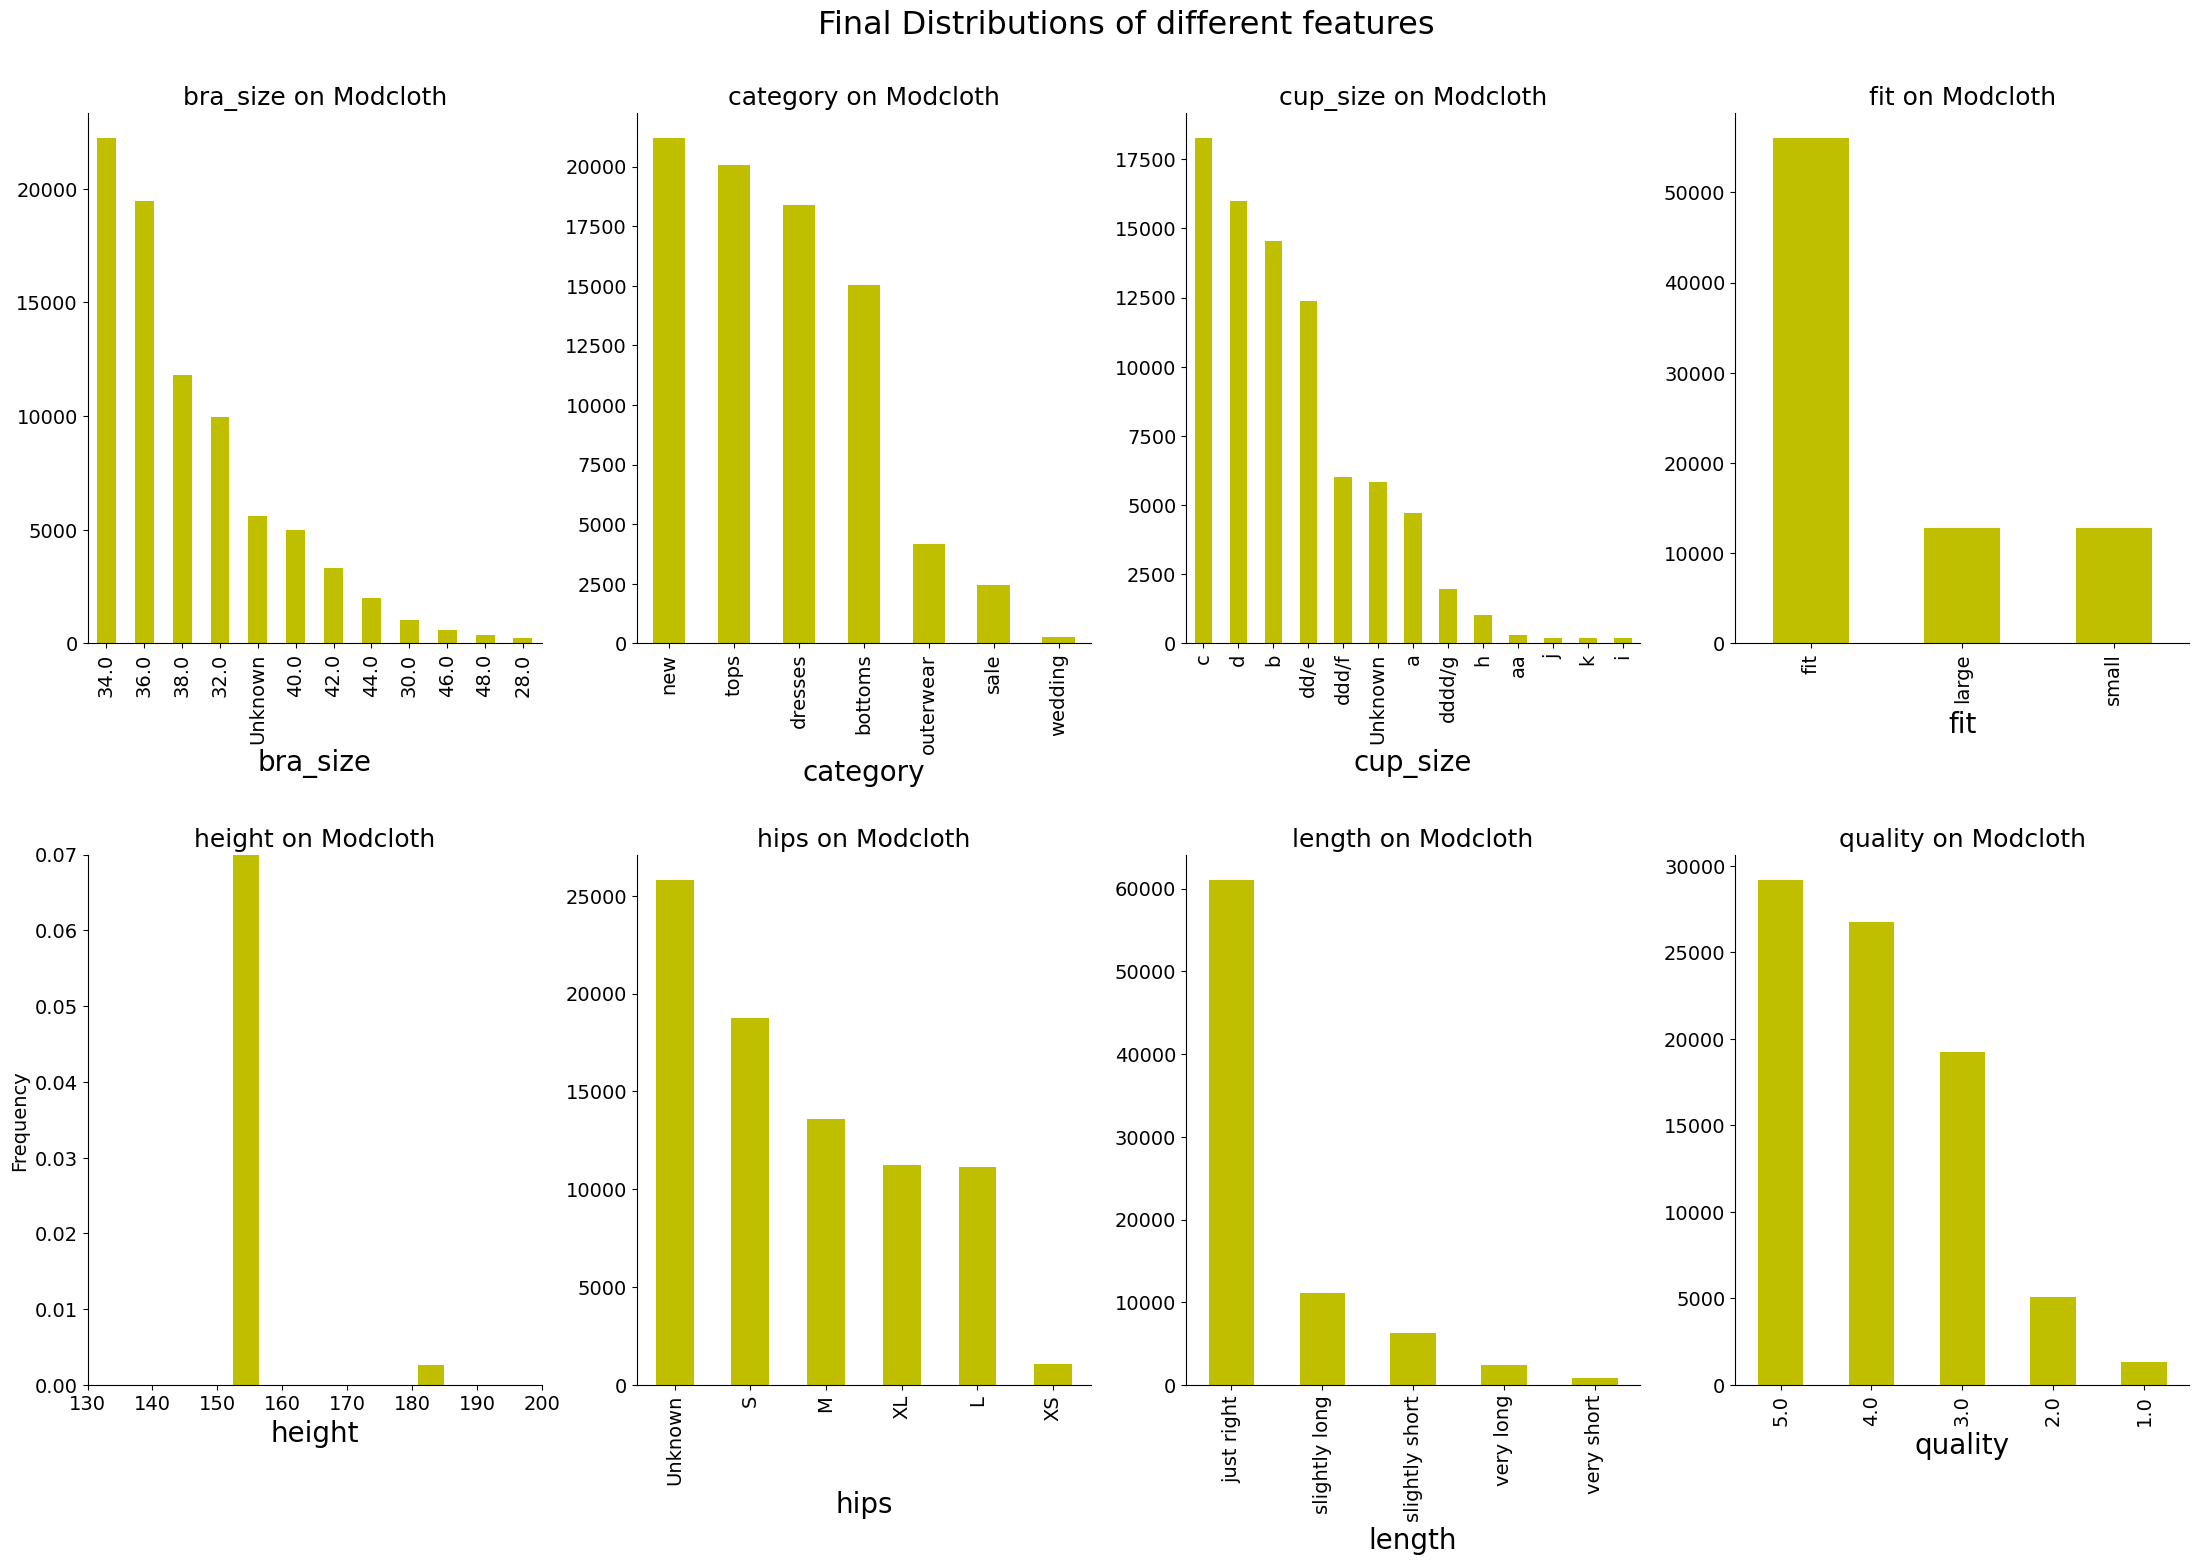

In [28]:
# EDA visualizations
def plot_dist(col, ax):
    if col != 'height':
        df[col].value_counts().plot(kind='bar', facecolor='y', ax=ax)
    else:
        df[col].plot(kind='hist', ax=ax, color='y', bins=30, density=True)
        # df[col].plot(kind='density', ax=ax, bw_method=0.15, color='y')  # Fix this line
        ax.set_xlim(130, 200)
        ax.set_ylim(0, 0.07)
    ax.set_xlabel('{}'.format(col), fontsize=20)
    ax.set_title('{} on Modcloth'.format(col), fontsize=18)
    return ax 

import matplotlib.pyplot as plt

f, ax = plt.subplots(2, 4, figsize=(22, 15))
f.tight_layout(h_pad=9, w_pad=2, rect=[0, 0.03, 1, 0.93])
cols = ['bra_size', 'category', 'cup_size', 'fit', 'height', 'hips', 'length', 'quality']
k = 0 
for i in range(2):
    for j in range(4):
        plot_dist(cols[k], ax[i][j])
        k += 1 

plt.suptitle("Final Distributions of different features", fontsize=23)
plt.show()


In [29]:
def plot_barh(df, col, cmap = None, stacked=False, norm=None):
    df.plot(kind='barh', colormap=cmap, stacked=stacked)
    fig = plt.gcf()
    fig.set_size_inches(24,12)
    plt.title('Category vs {}-feedback- Modcloth {}'.format(col, '(Normalized)' if norm else ''), fontsize=20)
    plt.ylabel('Category', fontsize = 18)
    plot = plt.xlabel('Frequency', fontsize=18)

def norm_counts(t):
    norms = np.linalg.norm(t.fillna(0), axis=1)
    t_norm = t[0:0]
    for row, euc in zip(t.iterrows(), norms):
        t_norm.loc[row[0]] = list(map(lambda x: x/euc, list(row[1])))
    return t_norm

In [30]:
df.category.value_counts()

category
new          21177
tops         20048
dresses      18402
bottoms      15047
outerwear     4180
sale          2469
wedding        271
Name: count, dtype: int64

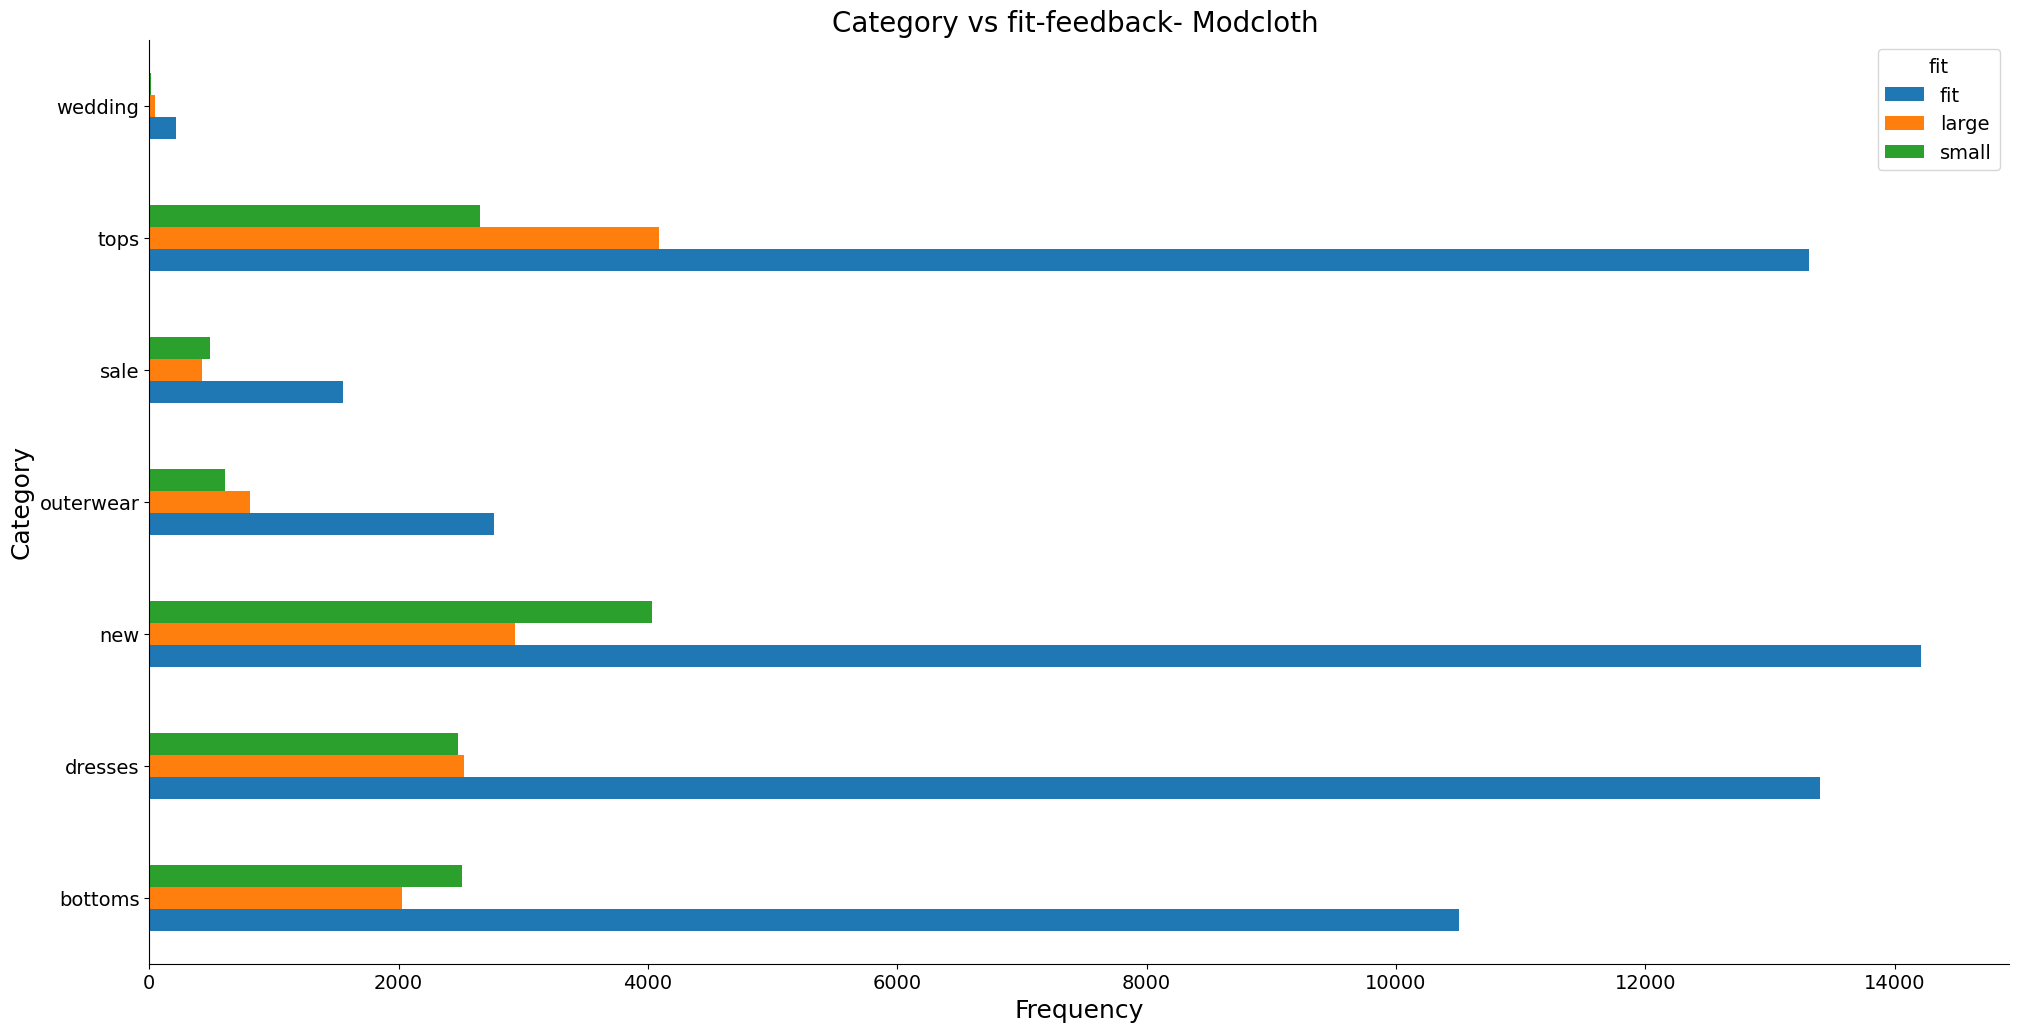

In [31]:
g_by_category = df.groupby('category')
cat_fit = g_by_category['fit'].value_counts()
cat_fit = cat_fit.unstack()
cat_fit_norm = norm_counts(cat_fit)
cat_fit_norm.drop(['fit'], axis=1, inplace=True)
plot_barh(cat_fit, 'fit')

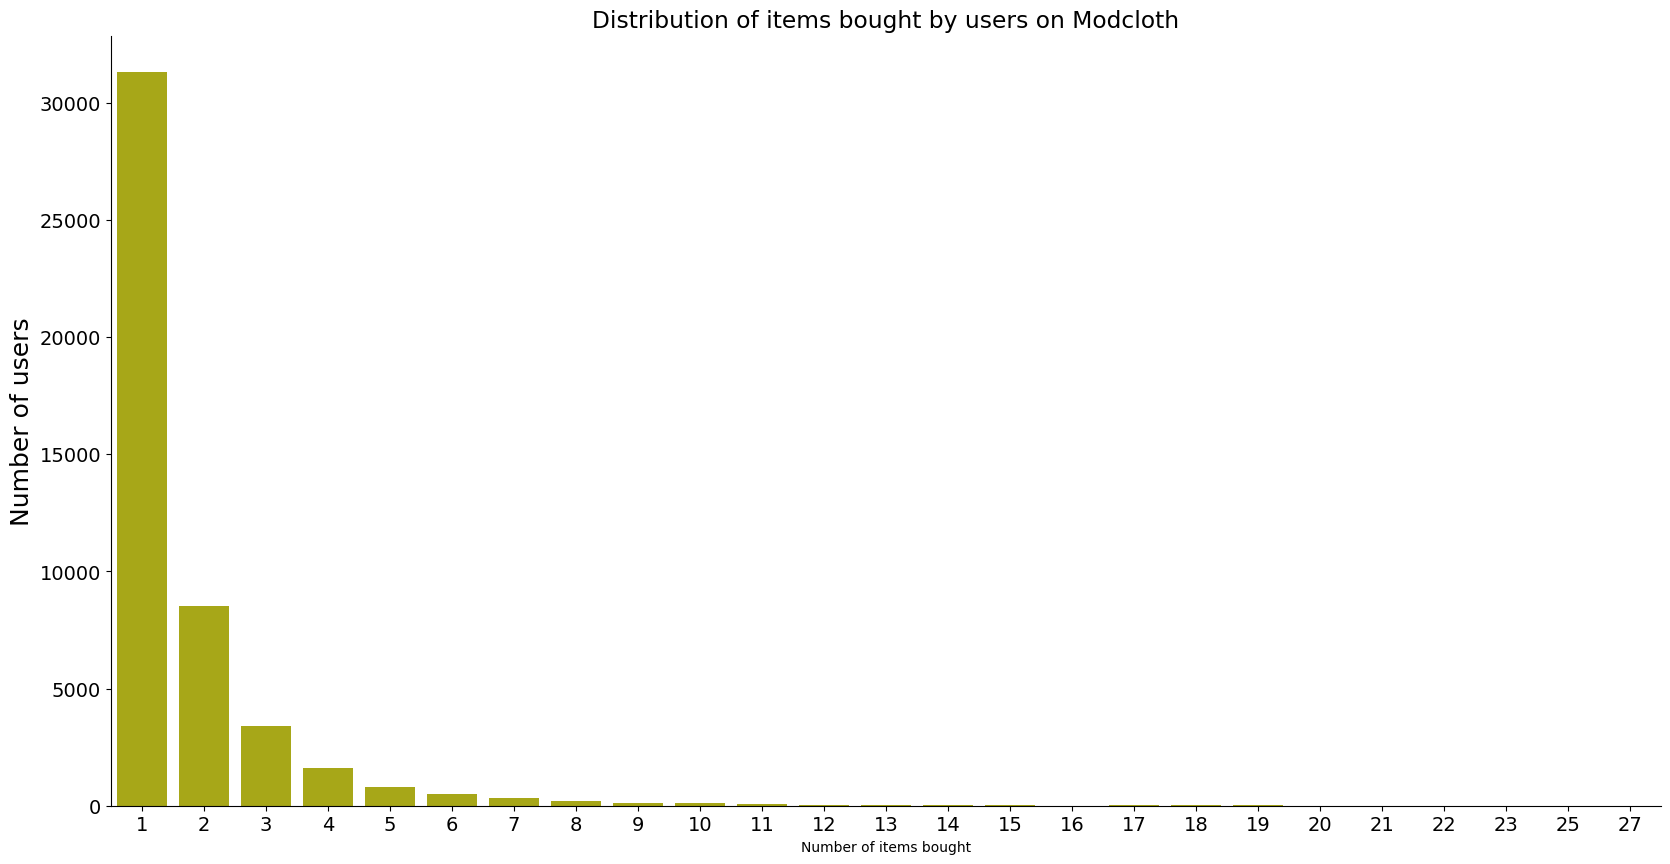

In [32]:
items_bought = []
total_users = []
for i in range(min(df.user_id.value_counts()), max(df.user_id.value_counts())+1):
    all_users = sum(df.user_id.value_counts() == i)
    if all_users != 0:
        total_users.append(all_users)
        items_bought.append(i)
plt.xlabel("Number of items bought", fontsize=10)
plt.ylabel("Number of users", fontsize=18)
plt.title("Distribution of items bought by users on Modcloth")
__ = sns.barplot(x=items_bought, y=total_users, color='y')
fig = plt.gcf()
fig.set_size_inches(20,10)